# Simple search demos

exercises done by Francesco Bredariol - course of Introduction to AI

### Exercise 1.
Define a depth-first search algorithm, first using recursion and than using a stack.
On input
```python
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

dfs(graph, 'A')
```
it should return string ' A B D E C F '

### Solution 1.
We use adjacency list to represent the graph, the initial node is a number, and we also keep track of the nodes visited during traversal.

In [1]:

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=" ")

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

We run the test example.

In [2]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

start = 'A'
goal = 'F'

dfs(graph, start)

A B D E C F 

We can visualise the graph.

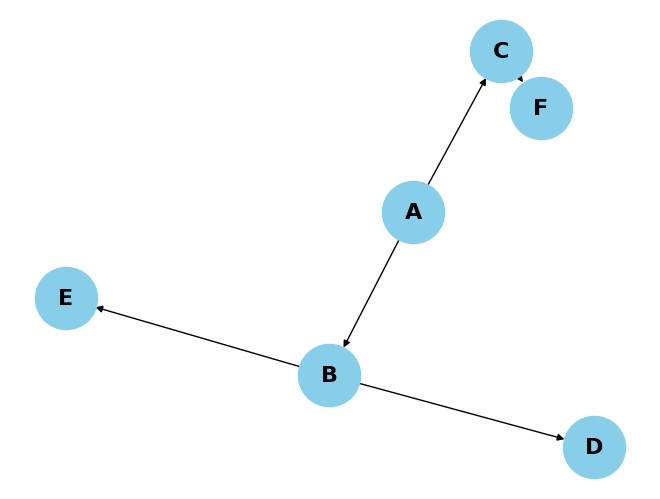

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraph(graph):
    # Create a directed graph in NetworkX
    G = nx.DiGraph()

    # Add nodes and edges from the adjacency list
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_color='black', font_weight='bold', arrows=True)

    # Display the graph
    plt.show()

visualiseGraph(graph)

We now define dfs using stack.

In [4]:
def dfs_iterative(graph, start, goal):
    visited = set()
    stack = [start]
    step = 0

    while stack:
        step = step + 1
        node = stack.pop()
        if node == goal:
            #print(node, end="")
            return step
        if node not in visited:
            #print(node, end=" ")
            visited.add(node)
            stack.extend(reversed(graph[node]))  # Reverse to maintain the order of traversal

dfs_iterative(graph,start, goal)

6

### Exercise 2
Implement BFS on 'graph'. What result you get?

### Solution 2

In [5]:
from collections import deque

def bfs(graph, start, goal):
    visited = set()
    queue = deque([start])
    step = 0

    while queue:
        step = step + 1
        node = queue.popleft()
        if node == goal:
            #print(node, end=" ")
            return step
            
        if node not in visited:
            visited.add(node)
            #print(node, end=" ")
            for neighbour in graph[node]:
                if neighbour not in visited:
                    queue.append(neighbour)

bfs(graph,start, goal)

6

### Exercise 3
Add weights and implement UCS, which you test on following input:
``` python

graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 3)],
    'D': [],
    'E': [],
    'F': []
}

ucs(graph, 'A', 'F')
```
What result do you expect?

### Solution 3

In [6]:
import heapq

def ucs(graph, start, goal):
    queue = [(0, start)]  # (cost, node)
    visited = set()

    while queue:
        cost, node = heapq.heappop(queue)

        if node not in visited:
            print(f"Visiting {node} with cost {cost}")
            visited.add(node)

            if node == goal:
                print(f"Reached {goal} with cost {cost}")
                return

            for neighbor_pack in graph[node]:
                neighbor, weight = neighbor_pack[0], neighbor_pack[1]
                if neighbor not in visited:
                    heapq.heappush(queue, (weight + cost, neighbor))
            
            print(queue)


In [7]:
graphW = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 3)],
    'D': [],
    'E': [],
    'F': []
}

ucs(graphW, 'A', 'F')

Visiting A with cost 0
[(1, 'B'), (4, 'C')]
Visiting B with cost 1
[(3, 'D'), (4, 'C'), (6, 'E')]
Visiting D with cost 3
[(4, 'C'), (6, 'E')]
Visiting C with cost 4
[(6, 'E'), (7, 'F')]
Visiting E with cost 6
[(7, 'F')]
Visiting F with cost 7
Reached F with cost 7


### We can visualise the graph as follows.

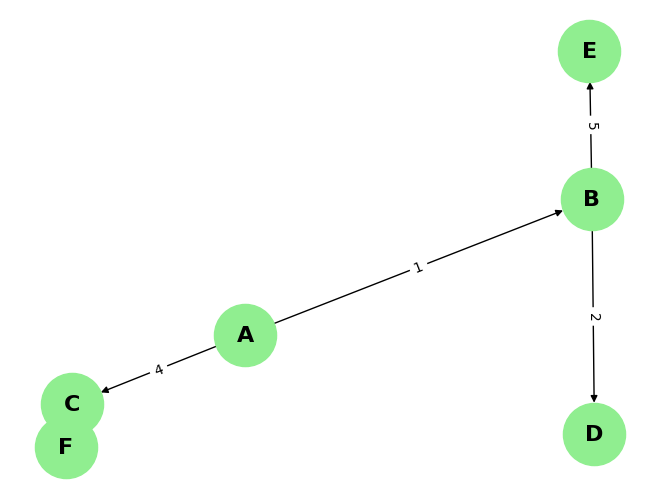

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visualiseGraphW(graph):
    # Create a directed graph in NetworkX
    G = nx.DiGraph()

    # Add nodes and weighted edges from the adjacency list
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=16, font_color='black', font_weight='bold', arrows=True)

    # Draw edge labels (the weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Display the graph
    plt.show()

visualiseGraphW(graphW)


### Exercise 4.
Implement iterative deepening search on the example of unweighted graph.

### Solution 4

In [9]:
# Depth-Limited Search (DLS)
def dls(graph, node, goal, depth, step = 0, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    if node == goal:
        return True, step  # Goal found

    if depth == 0:
        return False, step  # Depth limit reached

    # Explore neighbors
    for neighbor in graph[node]:
        if neighbor not in visited:
            flag, step = dls(graph, neighbor, goal, depth-1, step + 1, visited)
            if flag:
                return True, step
    return False, step

# Iterative Deepening Search (IDS)
def ids(graph, start, goal, max_depth):
    step = 0
    for depth in range(max_depth + 1):
        #print(f"Searching at depth {depth}...")
        visited = set()
        flag, step = dls(graph, start, goal, depth, step, visited)
        if flag:
            #print(f"Goal {goal} found at depth {depth}")
            return True, step
    #print(f"Goal {goal} not found within depth {max_depth}")
    return False, step

# Example usage
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': [],
    'F': []
}

start_node = 'A'
goal_node = 'F'
max_depth = 4

# Perform IDS
ids(graph, start_node, goal_node, max_depth)

(True, 7)

### Exercise 5 (HW)
Use the previous code to compare time and space performance of reaching a target node from start node with dfs, bfs, ids on randomly generated problem instances with 1000 nodes each.

In [10]:
import random

def random_graphW(size, density = 0.05, min = 1, max = 100):
    # we begin with a cyclic graph that have surely a way to connect any node to any other
    idxs = [i for i in range(size)]
    random.shuffle(idxs)
    r_g = {idxs[i]:[idxs[(i+1)%size]] for i in range(size)}
    # now we add some random edges (basing on the density parameter that's just a probability)
    # higher density parameter leads to dense graph, while lower density parameter to sparse graph
    # we will play with it while trying our search algorithm
    for node in r_g:
        for i in range (size):
            new_edge = random.uniform(0, 1)
            if new_edge <= density:
                if idxs[i] not in r_g[node] and idxs[i] != node:
                    r_g[node ].append(idxs[i])
    # and now we add the weights
    for node in r_g:
        for i in range(len(r_g[node])):
            r_g[node][i] = (r_g[node][i], int(random.uniform(min, max)))

    return r_g

def from_graphW_to_graph(graphW):
    graph = {}
    for node in graphW:
        graph[node] = []
        for neighbor in graphW[node]:
            graph[node].append(neighbor[0])
    return graph

In [11]:
size = 1000
density_parameter = [0.05, 0.1, 0.12, 0.2, 0.3, 0.5] # the first three are pretty sparse but then they become pretty dense

for d_p in density_parameter:
    print("--------------------------------")
    print(f"ACTUAL DENSITY PARAMETER IS {d_p}")
    r_g = from_graphW_to_graph(random_graphW(size, d_p))
    start = int(random.uniform(0, size))
    goal = int(random.uniform(0, size))
    print(f"WE START FROM NODE {start} TO ARRIVE AT NODE {goal}")
    dfs_performance = dfs_iterative(r_g, start, goal)
    bfs_performance = bfs(r_g, start, goal)
    ids_performance = ids(r_g, start, goal, size)[1]
    print(f"DFS FIND THE WAY IN {dfs_performance} STEP")
    print(f"BFS FIND THE WAY IN {bfs_performance} STEP")
    print(f"IDS FIND THE WAY IN {ids_performance} STEP")
    

--------------------------------
ACTUAL DENSITY PARAMETER IS 0.05
WE START FROM NODE 334 TO ARRIVE AT NODE 59
DFS FIND THE WAY IN 88 STEP
BFS FIND THE WAY IN 2548 STEP
IDS FIND THE WAY IN 833 STEP
--------------------------------
ACTUAL DENSITY PARAMETER IS 0.1
WE START FROM NODE 375 TO ARRIVE AT NODE 514
DFS FIND THE WAY IN 842 STEP
BFS FIND THE WAY IN 1610 STEP
IDS FIND THE WAY IN 772 STEP
--------------------------------
ACTUAL DENSITY PARAMETER IS 0.12
WE START FROM NODE 166 TO ARRIVE AT NODE 967
DFS FIND THE WAY IN 236 STEP
BFS FIND THE WAY IN 186 STEP
IDS FIND THE WAY IN 186 STEP
--------------------------------
ACTUAL DENSITY PARAMETER IS 0.2
WE START FROM NODE 296 TO ARRIVE AT NODE 683
DFS FIND THE WAY IN 831 STEP
BFS FIND THE WAY IN 243 STEP
IDS FIND THE WAY IN 243 STEP
--------------------------------
ACTUAL DENSITY PARAMETER IS 0.3
WE START FROM NODE 583 TO ARRIVE AT NODE 889
DFS FIND THE WAY IN 282 STEP
BFS FIND THE WAY IN 266 STEP
IDS FIND THE WAY IN 265 STEP
-------------

I surprisingly (surprisingly for me) discover that somehow, sometimes, ids and bfs just perform exactly the same. I think it could be because of the structure of the random graph, or because of an error in the step count of the ids.

### Implement Hanoi towers with UCS (HW)

Test case should have input as follows
``` python
n=4 # total number number of pegs
disks = list(range(1, n + 1))
initial_state = [disks, [], []]  # All disks on the first peg
goal_state = [[], [], disks]  # All disks on the third peg

graph = buildStateSpace(n)
ucs(graph, initial_state, goal_state)
```

output e.g. for n=2

[[1,2],[],[]] #'move disk of size 1 from peg 1 to peg 2'

[[2],[1],[]]  # move disk of size 2 from peg 1 to peg 3'

[[],[1],[2]]  #'move disk of size 1 from peg 2 to peg 3'

[[],[],[1,2]]


### Solution

In [12]:
import heapq

verbose = False

# Function to check if a move is valid
def is_valid_move(state, from_peg, to_peg):
    if not state[from_peg]:  # If the from_peg is empty, move is invalid
        return False
    if not state[to_peg]:  # If the to_peg is empty, move is valid
        return True
    return state[from_peg][0] < state[to_peg][0]  # Disk must be smaller than the one on the destination peg

# Function to perform the move
def move_disk(state, from_peg, to_peg):
    new_state = [peg[:] for peg in state]  # Create a copy of the current state
    disk = new_state[from_peg].pop(0)  # Remove top disk from the from_peg
    new_state[to_peg].insert(0, disk)  # Add it to the to_peg
    return new_state

# UCS algorithm for Towers of Hanoi
def ucs_hanoi(start_state, goal_state):
    # Priority queue for UCS (heap)
    frontier = []
    heapq.heappush(frontier, (0, start_state))  # (cost, state)

    # Dictionary to track visited states and their cost
    visited = {tuple(tuple(peg) for peg in start_state): 0}

    while frontier:
        current_cost, current_state = heapq.heappop(frontier)
        # Check if we've reached the goal
        if current_state == goal_state:                
            if verbose:
                print(f"Solution found with cost {current_cost}")
                print(current_state)
            return current_cost

        # Try all possible moves between the 3 pegs
        for from_peg in range(3):
            for to_peg in range(3):
                if from_peg != to_peg and is_valid_move(current_state, from_peg, to_peg):
                    new_state = move_disk(current_state, from_peg, to_peg)
                    new_cost = current_cost + 1  # Each move has cost 1

                    # If the new state has not been visited or found at a cheaper cost, add it to the frontier
                    state_tuple = tuple(tuple(peg) for peg in new_state)
                    if state_tuple not in visited or new_cost < visited[state_tuple]:
                        if verbose:
                            print(new_state)
                        visited[state_tuple] = new_cost
                        heapq.heappush(frontier, (new_cost, new_state))

    print("No solution found")
    return False

# Initial state and goal state for 4 disks
initial_state = [[1, 2, 3, 4, 5, 6, 7, 8], [], []]
goal_state = [[], [], [1, 2, 3, 4, 5, 6, 7, 8]]

# Perform UCS to solve the Towers of Hanoi
ucs_hanoi(initial_state, goal_state)


255

In [13]:
initial_state =[[],[],[]]
goal_state =[[],[],[]]
costs = []
for i in range (1, 15):
    initial_state[0].append(i)
    goal_state[2].append(i)
    costs.append(ucs_hanoi(initial_state, goal_state))

from matplotlib import pyplot as plt

plt.plot(costs)

KeyboardInterrupt: 